### Random Forest 
- Alternative to CNN for emotion classification
- Calculating additional distance-based features for each emotional class
- Code for webcam footage adapted from https://git.arts.ac.uk/lmccallum/STEM-4-Creatives-22-23/blob/main/STEM-Week-7-Video.ipynb

In [11]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report
#from sklearn.preprocessing import StandardScaler

df =pd.read_csv('final_cleaned_dataset.csv')

#print(df.head())
# NaN values present, string format, requires removal.
df.dropna(subset=['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY'], inplace=True)

eyes_x = df['EyesX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
eyes_y = df['EyesY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

nose_x = df['NoseX']
nose_y = df['NoseY']

mouth_x = df['MouthX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
mouth_y = df['MouthY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

print(df.head())

                               Image  EmotionClass  TotalFaceArea  \
0  pinterest_1105774514751656089.jpg  neutral-face       247009.0   
1   pinterest_708683691371518581.jpg  neutral-face       442225.0   
2   pinterest_414894184416715880.jpg  neutral-face       160000.0   
3    pinterest_42080577761597355.jpg  neutral-face       329476.0   
4   pinterest_506725395545039323.jpg  neutral-face        50176.0   

                                               EyesX  \
0  [152, 165, 193, 216, 191, 165, 315, 332, 364, ...   
1  [286, 325, 370, 404, 367, 321, 565, 600, 644, ...   
2  [205, 223, 243, 261, 239, 218, 362, 381, 404, ...   
3  [261, 282, 315, 347, 320, 288, 476, 499, 533, ...   
4  [230, 239, 250, 260, 249, 237, 306, 318, 329, ...   

                                               EyesY  \
0  [372, 358, 359, 378, 387, 387, 377, 355, 354, ...   
1  [1349, 1328, 1327, 1361, 1370, 1368, 1365, 133...   
2  [318, 313, 317, 329, 331, 329, 339, 332, 335, ...   
3  [567, 548, 540, 555, 

In [12]:
# Calculates the distances and angles between eye, nose and mouth  landmarkings
eyes_x = df['EyesX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
eyes_y = df['EyesY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

# Extract the first value from the NoseX and NoseY lists
nose_x = df['NoseX'].apply(lambda x: np.mean(list(map(float, x.strip('[]').split(',')))))
nose_y = df['NoseY'].apply(lambda x: np.mean(list(map(float, x.strip('[]').split(',')))))

mouth_x = df['MouthX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
mouth_y = df['MouthY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

# Calculate Distances
df['EyesDist'] = np.sqrt((eyes_x.apply(lambda x: x[0]) - eyes_x.apply(lambda x: x[1]))**2 + 
                         (eyes_y.apply(lambda x: x[0]) - eyes_y.apply(lambda x: x[1]))**2)

df['EyesToNoseDist'] = np.sqrt((((eyes_x.apply(lambda x: np.mean(x))) - nose_x)**2) + 
                               (((eyes_y.apply(lambda x: np.mean(x))) - nose_y)**2))

df['NoseToMouthDist'] = np.sqrt((nose_x - mouth_x.apply(lambda x: np.mean(x)))**2 + 
                                (nose_y - mouth_y.apply(lambda x: np.mean(x)))**2)

# Calculate Angles
df['MouthAngle'] = np.degrees(np.arctan2(mouth_y.apply(lambda x: x[0] - x[1]), 
                                         mouth_x.apply(lambda x: x[0] - x[1])))

df['NoseAngle'] = np.degrees(np.arctan2(nose_y - eyes_y.apply(lambda x: np.mean(x)), 
                                        nose_x - eyes_x.apply(lambda x: np.mean(x))))

df['EyesToMouthAngle'] = np.degrees(np.arctan2(mouth_y.apply(lambda x: np.mean(x)) - eyes_y.apply(lambda x: np.mean(x)), 
                                               mouth_x.apply(lambda x: np.mean(x)) - eyes_x.apply(lambda x: np.mean(x))))

# Display the first few rows of the resulting DataFrame
print(df[['EyesDist', 'EyesToNoseDist', 'NoseToMouthDist', 'MouthAngle', 'NoseAngle', 'EyesToMouthAngle']].head())


    EyesDist  EyesToNoseDist  NoseToMouthDist  MouthAngle   NoseAngle  \
0  19.104973      106.937100       107.911552  141.340192  109.981199   
1  44.294469       87.543342       138.076197  169.592289   89.645485   
2  18.681542       80.534294       101.025693  145.007980  105.668508   
3  28.319605      126.123135       126.229261  171.384352   83.417332   
4   9.486833       45.300731        48.642227  164.744881  113.240109   

   EyesToMouthAngle  
0         91.271154  
1         89.716423  
2         97.956284  
3         80.712061  
4         99.137368  


In [13]:
# Save data to csv sheet
df.to_csv('cleaned_facial_landmarks_data.csv', index=False)


In [14]:
import pandas as pd
import numpy as np
from ast import literal_eval

# Load your CSV file
df = pd.read_csv('cleaned_facial_landmarks_data.csv')

# Apply literal_eval to coordinate columns, handling NaN values
coord_columns = ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']
for col in coord_columns:
    df[col] = df[col].apply(lambda x: literal_eval(x) if pd.notna(x) else np.nan)

# Calculate the mean for each coordinate column
for col in coord_columns:
    df[f'{col}_mean'] = df[col].apply(np.mean)

# Convert TotalFaceArea to numeric
df['TotalFaceArea'] = pd.to_numeric(df['TotalFaceArea'], errors='coerce')

# Drop unnecessary columns
df = df.drop(columns=['Path', 'NumFaces'] + coord_columns)

# Drop rows with NaN values in necessary columns
necessary_columns = ['EmotionClass', 'TotalFaceArea'] + [f'{col}_mean' for col in coord_columns]
df = df.dropna(subset=necessary_columns)

# Normalize the coordinates by the square root of the TotalFaceArea
df['sqrt_TotalFaceArea'] = np.sqrt(df['TotalFaceArea'])
for col in coord_columns:
    mean_col = f'{col}_mean'
    df[f'{mean_col}_normalized'] = df[mean_col] / df['sqrt_TotalFaceArea']

# Calculate additional features using normalized values
df['EyeToNose'] = np.sqrt((df['EyesX_mean_normalized'] - df['NoseX_mean_normalized'])**2 + 
                          (df['EyesY_mean_normalized'] - df['NoseY_mean_normalized'])**2)

df['EyeToMouth'] = np.sqrt((df['EyesX_mean_normalized'] - df['MouthX_mean_normalized'])**2 + 
                           (df['EyesY_mean_normalized'] - df['MouthY_mean_normalized'])**2)

df['NoseToMouth'] = np.sqrt((df['NoseX_mean_normalized'] - df['MouthX_mean_normalized'])**2 + 
                            (df['NoseY_mean_normalized'] - df['MouthY_mean_normalized'])**2)

df['EyeAspectRatio'] = np.abs(df['EyesX_mean_normalized'] - df['MouthX_mean_normalized']) / \
                       np.abs(df['EyesY_mean_normalized'] - df['MouthY_mean_normalized'])

print("DataFrame shape after preprocessing:", df.shape)


DataFrame shape after preprocessing: (3947, 26)


### Plots 
- Visualising the relationships between facial features and emotions


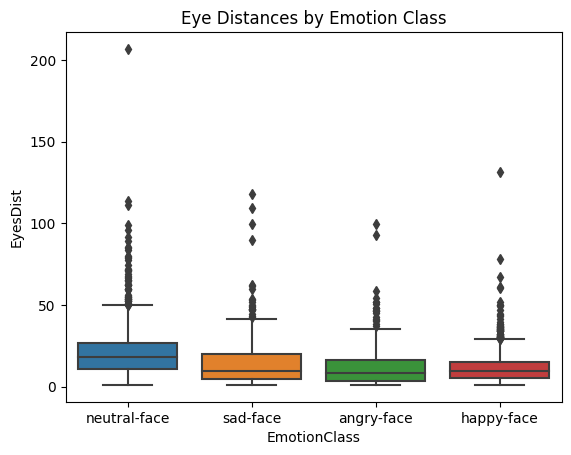

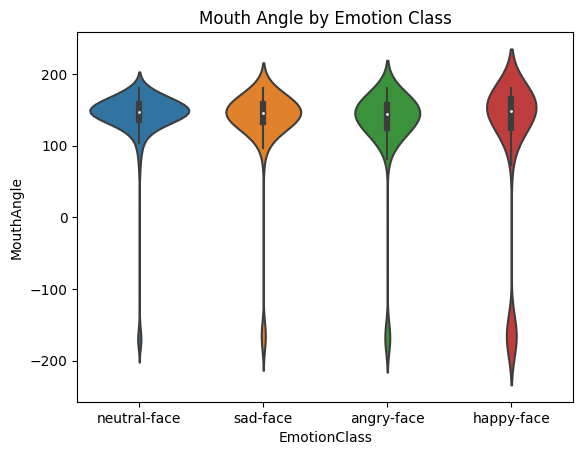

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('cleaned_facial_landmarks_data.csv')

sns.boxplot(x='EmotionClass', y='EyesDist', data=df)
plt.title('Eye Distances by Emotion Class')
plt.show()

# Violin plot of Mouth Angle by Emotion Class
sns.violinplot(x='EmotionClass', y='MouthAngle', data=df)
plt.title('Mouth Angle by Emotion Class')
plt.show()

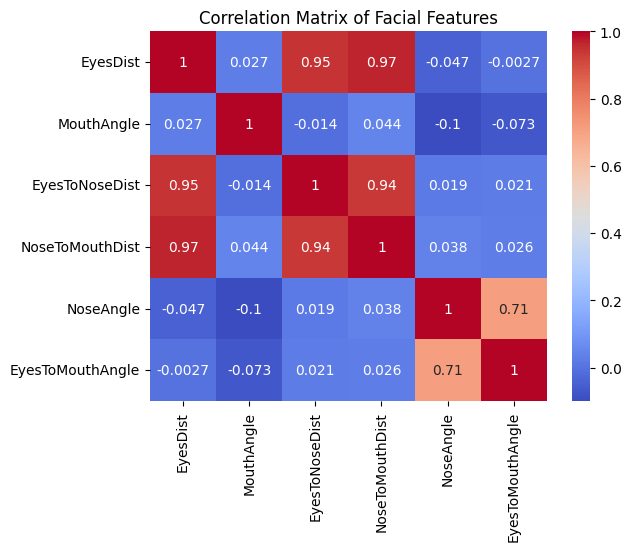

In [16]:
# All data ( every emotional class) for a general picture
corr_matrix = df[['EyesDist', 'MouthAngle', 'EyesToNoseDist', 'NoseToMouthDist', 'NoseAngle', 'EyesToMouthAngle']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Facial Features')
plt.show()

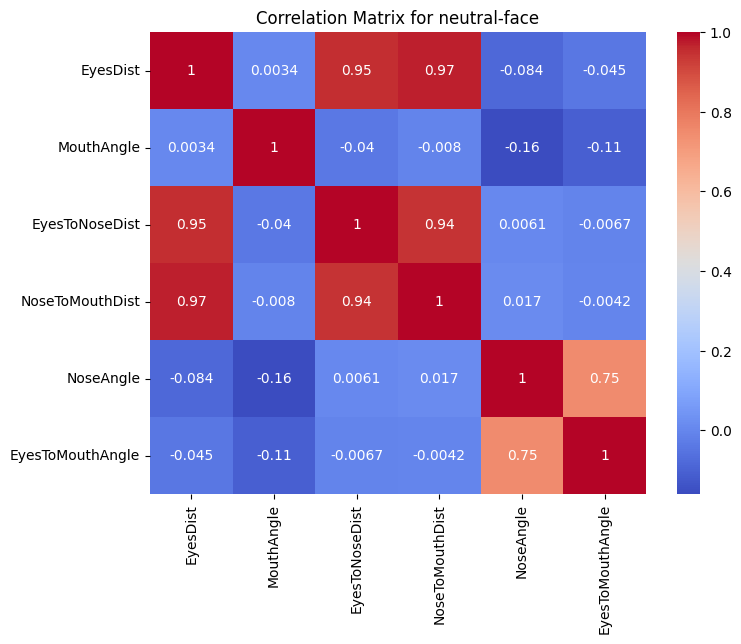

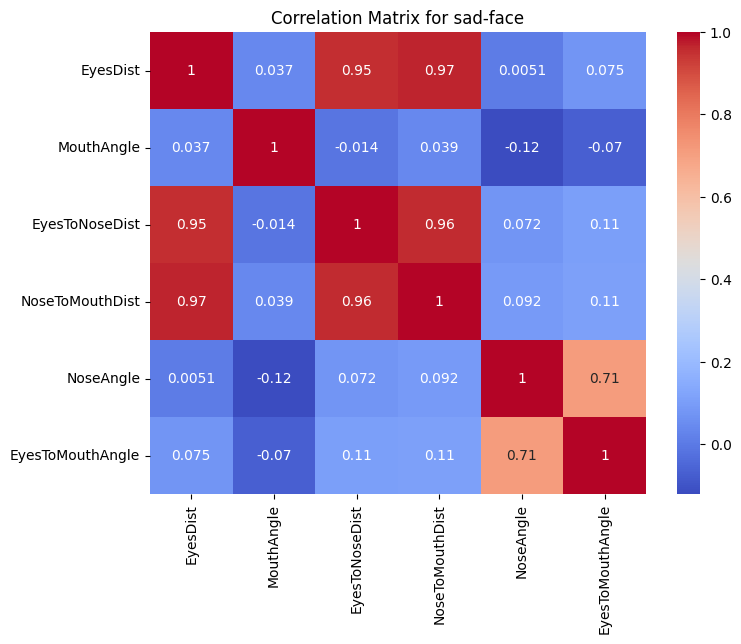

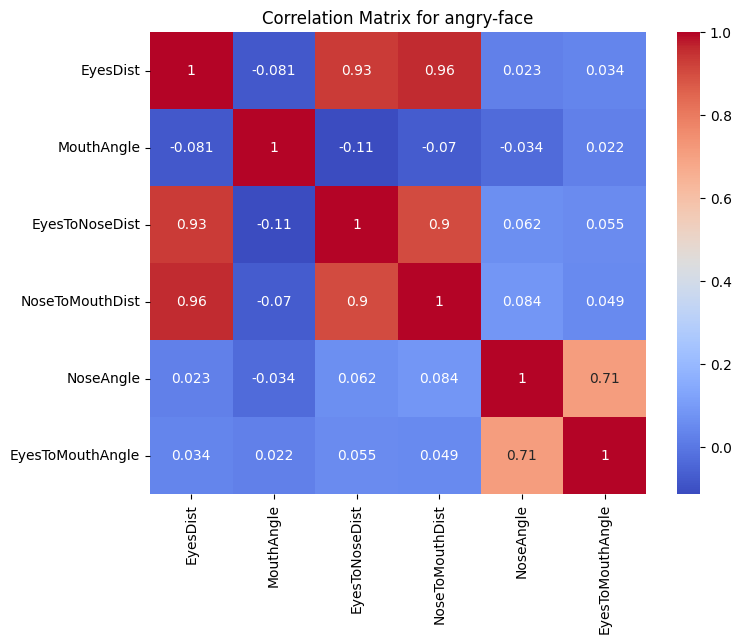

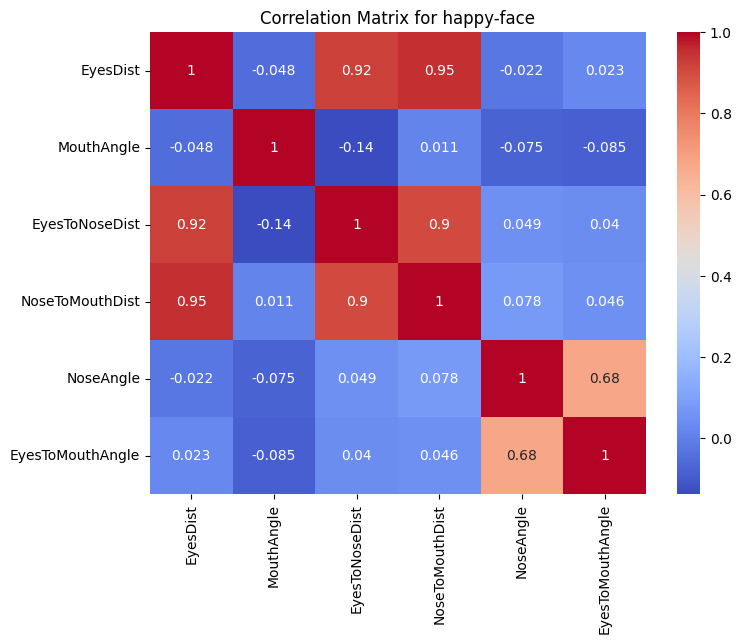

In [17]:
emotions = df['EmotionClass'].unique()

# Plot heatmap for each emotion
for emotion in emotions:
    plt.figure(figsize=(8, 6))
    subset = df[df['EmotionClass'] == emotion]
    corr_matrix = subset[['EyesDist', 'MouthAngle', 'EyesToNoseDist', 'NoseToMouthDist', 'NoseAngle', 'EyesToMouthAngle']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {emotion}')
    plt.show()


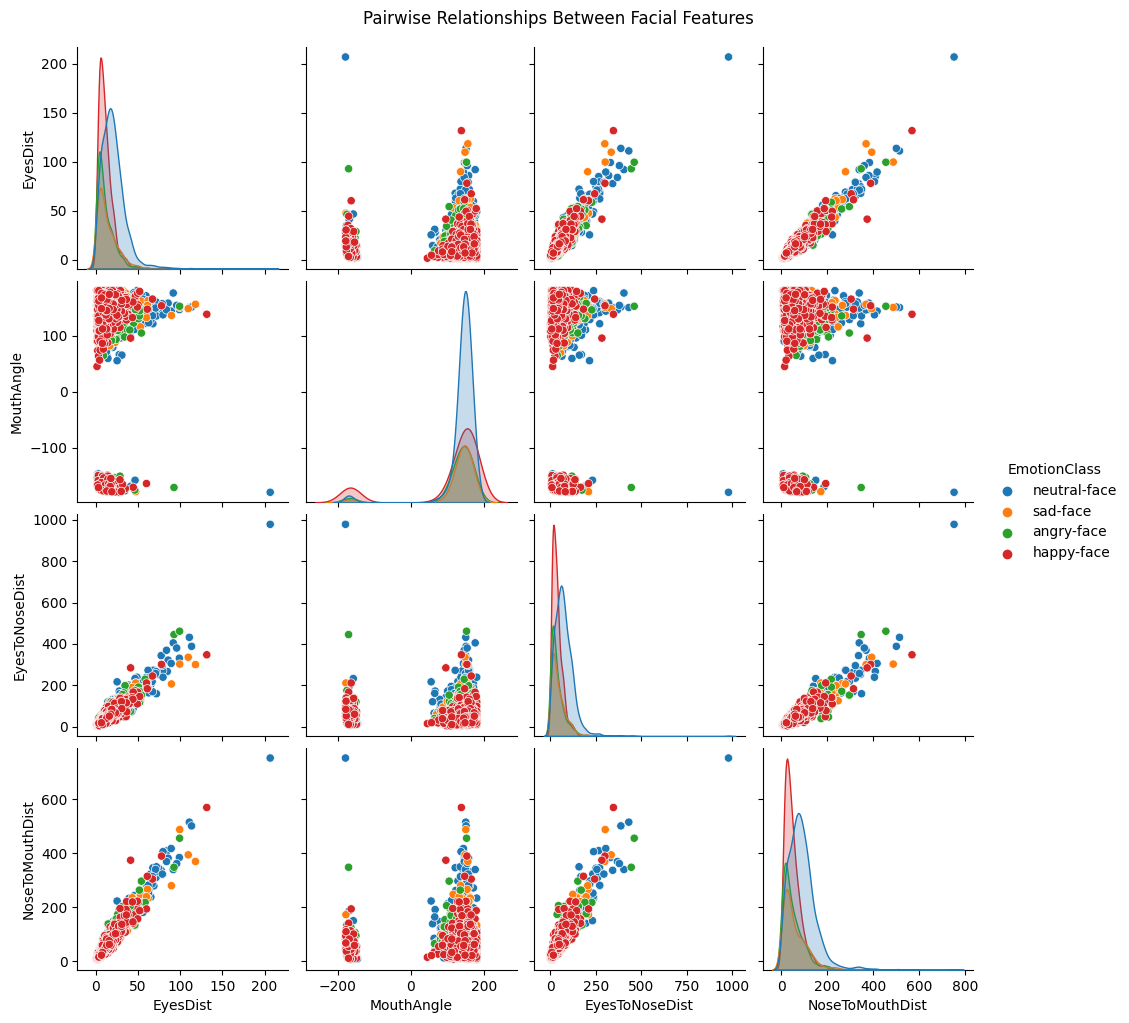

In [7]:
sns.pairplot(df, hue='EmotionClass', vars=['EyesDist', 'MouthAngle', 'EyesToNoseDist', 'NoseToMouthDist'])
plt.suptitle('Pairwise Relationships Between Facial Features', y=1.02)
plt.show()

### Normalization and statistics

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from ast import literal_eval

# Load your CSV file
df = pd.read_csv('cleaned_facial_landmarks_data.csv')

# Convert string representations of lists into actual lists
for col in ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']:
    df[col] = df[col].apply(lambda x: literal_eval(x) if isinstance(x, str) else np.nan)

# Compute the mean of the lists
for col in ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']:
    df[f'{col}_mean'] = df[col].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

# Convert TotalFaceArea to numeric and drop rows with NaN values
df['TotalFaceArea'] = pd.to_numeric(df['TotalFaceArea'], errors='coerce')
necessary_columns = ['EmotionClass', 'TotalFaceArea'] + [f'{col}_mean' for col in ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']]
df = df.dropna(subset=necessary_columns)

# Calculate distances
df['EyeToNose'] = np.sqrt((df['EyesX_mean'] - df['NoseX_mean'])**2 + (df['EyesY_mean'] - df['NoseY_mean'])**2)
df['EyeToMouth'] = np.sqrt((df['EyesX_mean'] - df['MouthX_mean'])**2 + (df['EyesY_mean'] - df['MouthY_mean'])**2)
df['NoseToMouth'] = np.sqrt((df['NoseX_mean'] - df['MouthX_mean'])**2 + (df['NoseY_mean'] - df['MouthY_mean'])**2)
df['EyeAspectRatio'] = np.abs(df['EyesX_mean'] - df['MouthX_mean']) / np.abs(df['EyesY_mean'] - df['MouthY_mean'])

# Normalize features by TotalFaceArea
df['EyeToNose_normalized'] = df['EyeToNose'] / df['TotalFaceArea']
df['EyeToMouth_normalized'] = df['EyeToMouth'] / df['TotalFaceArea']
df['NoseToMouth_normalized'] = df['NoseToMouth'] / df['TotalFaceArea']
df['EyeAspectRatio_normalized'] = df['EyeAspectRatio'] / df['TotalFaceArea']

# Select features for the model
features = ['EyeToNose_normalized', 'EyeToMouth_normalized', 'NoseToMouth_normalized', 'EyeAspectRatio_normalized']
X = df[features]
y = df['EmotionClass']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Print feature importances
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"{feature}: {importance}")


              precision    recall  f1-score   support

  angry-face       0.49      0.35      0.41       140
  happy-face       0.41      0.51      0.45       210
neutral-face       0.59      0.67      0.62       331
    sad-face       0.21      0.10      0.14       109

    accuracy                           0.49       790
   macro avg       0.42      0.41      0.41       790
weighted avg       0.47      0.49      0.47       790

EyeToNose_normalized: 0.2397753052177259
EyeToMouth_normalized: 0.24822546935191897
NoseToMouth_normalized: 0.2681794582024271
EyeAspectRatio_normalized: 0.24381976722792809


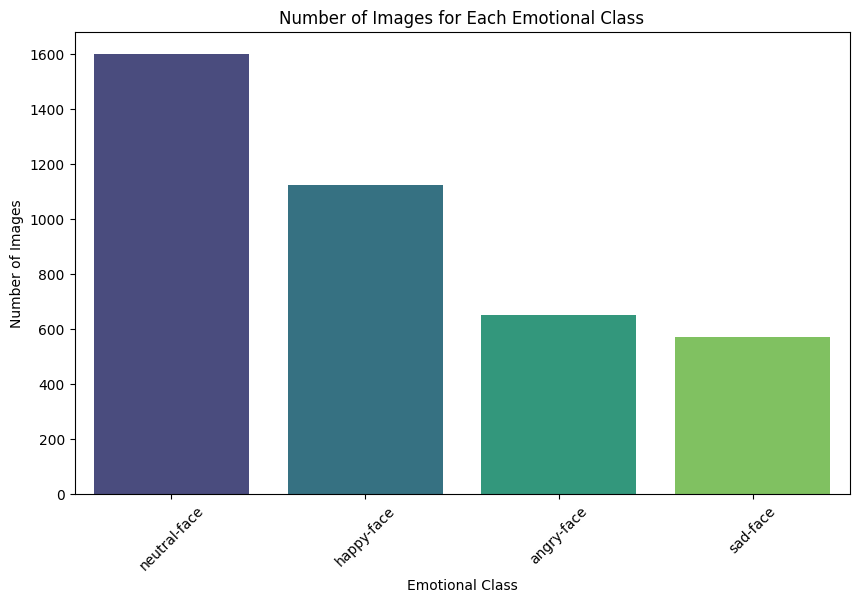

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_facial_landmarks_data.csv')

# Count the number of images for each emotional class
class_counts = df['EmotionClass'].value_counts().reset_index()
class_counts.columns = ['EmotionClass', 'Number of Images']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='EmotionClass', y='Number of Images', data=class_counts, palette='viridis')
plt.title('Number of Images for Each Emotional Class')
plt.xlabel('Emotional Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()
